In [1]:
import pandas as pd
import numpy as np

C:\Users\YOSSI\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.DataFrame(

    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}

)

In [3]:
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [4]:
df[(df.AAA <= 6) & (df.index.isin([0, 2, 4]))]

,AAA,BBB,CCC
0,4,10,100
2,6,30,-30


In [5]:
df.index

RangeIndex(start=0, stop=4, step=1)

In [6]:
df.index.isin([0,2,4])

array([ True, False,  True, False])

In [7]:
df = pd.DataFrame(

    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]},

    index=["foo", "bar", "boo", "kar"],

)

In [8]:
df

,AAA,BBB,CCC
foo,4,10,100
bar,5,20,50
boo,6,30,-30
kar,7,40,-50


In [9]:
df.loc["bar":"kar"]  # Label

,AAA,BBB,CCC
bar,5,20,50
boo,6,30,-30
kar,7,40,-50


In [10]:
df[0:3]

,AAA,BBB,CCC
foo,4,10,100
bar,5,20,50
boo,6,30,-30


In [11]:
df["bar":"kar"]

,AAA,BBB,CCC
bar,5,20,50
boo,6,30,-30
kar,7,40,-50


In [12]:
data = {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}

In [13]:
data

{'AAA': [4, 5, 6, 7], 'BBB': [10, 20, 30, 40], 'CCC': [100, 50, -30, -50]}

In [14]:
df2 = pd.DataFrame(data=data, index=[1, 2, 3, 4])  # Note index starts at 1.

In [15]:
df2.iloc[1:3]  # Position-oriented

,AAA,BBB,CCC
2,5,20,50
3,6,30,-30


In [16]:
df2.loc[1:3]

,AAA,BBB,CCC
1,4,10,100
2,5,20,50
3,6,30,-30


In [17]:
df = pd.DataFrame(

    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}

)

In [18]:
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [19]:
df[~((df.AAA <= 6) & (df.index.isin([0, 2, 4])))]

,AAA,BBB,CCC
1,5,20,50
3,7,40,-50


In [20]:
df = pd.DataFrame({"AAA": [1, 2, 1, 3], "BBB": [1, 1, 2, 2], "CCC": [2, 1, 3, 1]})

In [21]:
df

,AAA,BBB,CCC
0,1,1,2
1,2,1,1
2,1,2,3
3,3,2,1


In [22]:
source_cols = df.columns  # Or some subset would work too

In [23]:
source_cols

Index(['AAA', 'BBB', 'CCC'], dtype='object')

In [24]:
new_cols = [str(x) + "_cat" for x in source_cols]

In [25]:
new_cols

['AAA_cat', 'BBB_cat', 'CCC_cat']

In [26]:
categories = {1: "Alpha", 2: "Beta", 3: "Charlie"}

In [27]:
categories.get

<function dict.get(key, default=None, /)>

In [28]:
df[new_cols] = df[source_cols].map(categories.get)

In [29]:
df

,AAA,BBB,CCC,AAA_cat,BBB_cat,CCC_cat
0,1,1,2,Alpha,Alpha,Beta
1,2,1,1,Beta,Alpha,Alpha
2,1,2,3,Alpha,Beta,Charlie
3,3,2,1,Charlie,Beta,Alpha


In [30]:
df = pd.DataFrame(

    {"AAA": [1, 1, 1, 2, 2, 2, 3, 3], "BBB": [2, 1, 3, 4, 5, 1, 2, 3]}

)

In [31]:
df

,AAA,BBB
0,1,2
1,1,1
2,1,3
3,2,4
4,2,5
5,2,1
6,3,2
7,3,3


In [32]:
df.loc[df.groupby("AAA")["BBB"].idxmin()]

,AAA,BBB
1,1,1
5,2,1
6,3,2


In [33]:
df.sort_values(by="BBB").groupby("AAA", as_index=False).first()

,AAA,BBB
0,1,1
1,2,1
2,3,2


In [34]:
df.sort_values(by="BBB").groupby("AAA").first()

,BBB
AAA,
1,1
2,1
3,2


In [35]:
df = pd.DataFrame(

    {

        "row": [0, 1, 2],

        "One_X": [1.1, 1.1, 1.1],

        "One_Y": [1.2, 1.2, 1.2],

        "Two_X": [1.11, 1.11, 1.11],

        "Two_Y": [1.22, 1.22, 1.22],

    }

)

df

,row,One_X,One_Y,Two_X,Two_Y
0,0,1.1,1.2,1.11,1.22
1,1,1.1,1.2,1.11,1.22
2,2,1.1,1.2,1.11,1.22


In [36]:
df = df.set_index("row")

In [37]:
df

,One_X,One_Y,Two_X,Two_Y
row,,,,
0,1.1,1.2,1.11,1.22
1,1.1,1.2,1.11,1.22
2,1.1,1.2,1.11,1.22


In [38]:
df.columns = pd.MultiIndex.from_tuples([tuple(c.split("_")) for c in df.columns])

In [39]:
df

One        Two      
       X    Y     X     Y
row                      
0    1.1  1.2  1.11  1.22
1    1.1  1.2  1.11  1.22
2    1.1  1.2  1.11  1.22

In [40]:
df.loc[0, "One"]

X    1.1
Y    1.2
Name: 0, dtype: float64

In [41]:
df1 = df.stack(0, future_stack=True)

In [42]:
df1

X     Y
row                
0   One  1.10  1.20
    Two  1.11  1.22
1   One  1.10  1.20
    Two  1.11  1.22
2   One  1.10  1.20
    Two  1.11  1.22

In [43]:
df2 = df.stack(0, future_stack=True).reset_index(1)

In [44]:
df2

,level_1,X,Y
row,,,
0,One,1.10,1.20
0,Two,1.11,1.22
1,One,1.10,1.20
1,Two,1.11,1.22
2,One,1.10,1.20
2,Two,1.11,1.22


In [45]:
df2.columns = ["Sample", "All_X", "All_Y"]

In [46]:
df2

,Sample,All_X,All_Y
row,,,
0,One,1.10,1.20
0,Two,1.11,1.22
1,One,1.10,1.20
1,Two,1.11,1.22
2,One,1.10,1.20
2,Two,1.11,1.22


In [47]:
cols = pd.MultiIndex.from_tuples(

    [(x, y) for x in ["A", "B", "C"] for y in ["O", "I"]]

)
cols

MultiIndex([('A', 'O'),
            ('A', 'I'),
            ('B', 'O'),
            ('B', 'I'),
            ('C', 'O'),
            ('C', 'I')],
           )

In [48]:
df = pd.DataFrame(np.random.randn(2, 6), index=["n", "m"], columns=cols)
df

A                   B                   C          
          O         I         O         I         O         I
n -0.489048 -0.378181 -1.712937 -1.625897 -1.231721  0.150321
m -0.638596 -0.298870 -0.996990  0.299396 -0.451506  0.567363

In [49]:
df1 = df.div(df["C"], level=1)
df1

A                   B               C     
          O         I         O          I    O    I
n  0.397044 -2.515819  1.390686 -10.816154  1.0  1.0
m  1.414369 -0.526770  2.208142   0.527699  1.0  1.0

In [50]:
#misalignment
df2 = df.div(df["C"], level=0)
df2

A       B       C    
    O   I   O   I   O   I
n NaN NaN NaN NaN NaN NaN
m NaN NaN NaN NaN NaN NaN

In [51]:
df1['A']

,O,I
n,0.397044,-2.515819
m,1.414369,-0.526770


In [52]:
df1[('A', 'O')]

n    0.397044
m    1.414369
Name: (A, O), dtype: float64

In [53]:
df1.loc[:, ('A', 'O')]

n    0.397044
m    1.414369
Name: (A, O), dtype: float64

In [54]:
df1.loc["m", ('A', 'O')]

1.4143686106744793

In [55]:
df1.loc[:, 'A']

,O,I
n,0.397044,-2.515819
m,1.414369,-0.526770


In [56]:
df1.loc["n", 'A']

O    0.397044
I   -2.515819
Name: n, dtype: float64

In [57]:
df.xs('O', axis=1, level=1)  # Selects all 'O' subcolumns across all top-level columns

,A,B,C
n,-0.489048,-1.712937,-1.231721
m,-0.638596,-0.996990,-0.451506


In [58]:
df.loc[:, (slice(None), "O")]

,A,B,C
,O,O,O
n,-0.489048,-1.712937,-1.231721
m,-0.638596,-0.996990,-0.451506


In [59]:
idx = pd.IndexSlice
idx['A':'C', 'O']

(slice('A', 'C', None), 'O')

In [60]:
idx = pd.IndexSlice
df.loc[:, idx['A':'C', 'O']]  # Selects 'O' subcolumns for A and B

,A,B,C
,O,O,O
n,-0.489048,-1.712937,-1.231721
m,-0.638596,-0.996990,-0.451506


In [61]:
idx = pd.IndexSlice
df.loc[:, (slice('A', 'C'), 'O')] 

,A,B,C
,O,O,O
n,-0.489048,-1.712937,-1.231721
m,-0.638596,-0.996990,-0.451506


In [62]:
coords = [("AA", "one"), ("AA", "six"), ("BB", "one"), ("BB", "two"), ("BB", "six")]
coords

[('AA', 'one'), ('AA', 'six'), ('BB', 'one'), ('BB', 'two'), ('BB', 'six')]

In [63]:
index = pd.MultiIndex.from_tuples(coords)

In [64]:
df = pd.DataFrame([11, 22, 33, 44, 55], index, ["MyData"])
df

MyData
AA one      11
   six      22
BB one      33
   two      44
   six      55

In [65]:
df.xs("BB", level=0, axis=0)

,MyData
one,33
two,44
six,55


In [66]:
df.xs("six", level=1, axis=0)

,MyData
AA,22
BB,55


In [67]:
#Selecting a single level
result = df.xs('AA')
result

,MyData
one,11
six,22


In [68]:
result = df.xs(('BB', 'two'))
result

MyData    44
Name: (BB, two), dtype: int64

In [69]:
# Select all rows where the second level is 'one'
result = df.xs('one', level=1)
result

,MyData
AA,11
BB,33


In [70]:
result = df.xs('AA', drop_level=False)
result

MyData
AA one      11
   six      22

In [71]:
# Select all rows from 'AA' to 'BB' (inclusive)
result = df.loc[(slice('AA', 'BB'), slice(None))]
result

MyData
AA one      11
   six      22
BB one      33
   two      44
   six      55

In [72]:
# If we had multiple columns, we could select a specific one
# For this example, we'll just demonstrate the syntax
result = df.xs('AA')['MyData']
result

one    11
six    22
Name: MyData, dtype: int64

In [73]:
# Select rows where 'MyData' > 30 for the first level 'BB'
result = df.xs('BB')[df.xs('BB')['MyData'] > 30]
result

,MyData
one,33
two,44
six,55


In [74]:
#Slicing a MultiIndex with xs, method #2

import itertools

index = list(itertools.product(["Ada", "Quinn", "Violet"], ["Comp", "Math", "Sci"]))

headr = list(itertools.product(["Exams", "Labs"], ["I", "II"]))

indx = pd.MultiIndex.from_tuples(index, names=["Student", "Course"])

cols = pd.MultiIndex.from_tuples(headr)  # Notice these are un-named

data = [[70 + x + y + (x * y) % 3 for x in range(4)] for y in range(9)]

In [75]:
index


[('Ada', 'Comp'),
 ('Ada', 'Math'),
 ('Ada', 'Sci'),
 ('Quinn', 'Comp'),
 ('Quinn', 'Math'),
 ('Quinn', 'Sci'),
 ('Violet', 'Comp'),
 ('Violet', 'Math'),
 ('Violet', 'Sci')]

In [76]:
headr

[('Exams', 'I'), ('Exams', 'II'), ('Labs', 'I'), ('Labs', 'II')]

In [77]:
indx

MultiIndex([(   'Ada', 'Comp'),
            (   'Ada', 'Math'),
            (   'Ada',  'Sci'),
            ( 'Quinn', 'Comp'),
            ( 'Quinn', 'Math'),
            ( 'Quinn',  'Sci'),
            ('Violet', 'Comp'),
            ('Violet', 'Math'),
            ('Violet',  'Sci')],
           names=['Student', 'Course'])

In [78]:
cols

MultiIndex([('Exams',  'I'),
            ('Exams', 'II'),
            ( 'Labs',  'I'),
            ( 'Labs', 'II')],
           )

In [79]:
data

[[70, 71, 72, 73],
 [71, 73, 75, 74],
 [72, 75, 75, 75],
 [73, 74, 75, 76],
 [74, 76, 78, 77],
 [75, 78, 78, 78],
 [76, 77, 78, 79],
 [77, 79, 81, 80],
 [78, 81, 81, 81]]

In [80]:
df = pd.DataFrame(data, indx, cols)
df

Exams     Labs    
                   I  II    I  II
Student Course                   
Ada     Comp      70  71   72  73
        Math      71  73   75  74
        Sci       72  75   75  75
Quinn   Comp      73  74   75  76
        Math      74  76   78  77
        Sci       75  78   78  78
Violet  Comp      76  77   78  79
        Math      77  79   81  80
        Sci       78  81   81  81

In [81]:
All = slice(None)
All

slice(None, None, None)

In [82]:
df.loc["Violet"]

Exams     Labs    
           I  II    I  II
Course                   
Comp      76  77   78  79
Math      77  79   81  80
Sci       78  81   81  81

In [83]:
df.loc[(All, "Math"), All]

Exams     Labs    
                   I  II    I  II
Student Course                   
Ada     Math      71  73   75  74
Quinn   Math      74  76   78  77
Violet  Math      77  79   81  80

In [84]:
df.loc[(slice("Ada", "Quinn"), "Math"), All]

Exams     Labs    
                   I  II    I  II
Student Course                   
Ada     Math      71  73   75  74
Quinn   Math      74  76   78  77

In [85]:
df.loc[(All, "Math"), ("Exams")]

,,I,II
Student,Course,,
Ada,Math,71,73
Quinn,Math,74,76
Violet,Math,77,79


In [86]:
df.loc[(All, "Math"), (All, "II")]

,,Exams,Labs
,,II,II
Student,Course,,
Ada,Math,73,74
Quinn,Math,76,77
Violet,Math,79,80


In [87]:
#Sorting

#Sort by specific column or an ordered list of columns, with a MultiIndex
df.sort_values(by=("Labs", "II"), ascending=False)

Exams     Labs    
                   I  II    I  II
Student Course                   
Violet  Sci       78  81   81  81
        Math      77  79   81  80
        Comp      76  77   78  79
Quinn   Sci       75  78   78  78
        Math      74  76   78  77
        Comp      73  74   75  76
Ada     Sci       72  75   75  75
        Math      71  73   75  74
        Comp      70  71   72  73

In [88]:
df.sort_index(level='Student')

Exams     Labs    
                   I  II    I  II
Student Course                   
Ada     Comp      70  71   72  73
        Math      71  73   75  74
        Sci       72  75   75  75
Quinn   Comp      73  74   75  76
        Math      74  76   78  77
        Sci       75  78   78  78
Violet  Comp      76  77   78  79
        Math      77  79   81  80
        Sci       78  81   81  81

In [89]:
df.sort_index(level=['Student', 'Course'])

Exams     Labs    
                   I  II    I  II
Student Course                   
Ada     Comp      70  71   72  73
        Math      71  73   75  74
        Sci       72  75   75  75
Quinn   Comp      73  74   75  76
        Math      74  76   78  77
        Sci       75  78   78  78
Violet  Comp      76  77   78  79
        Math      77  79   81  80
        Sci       78  81   81  81

In [90]:
# Sorting rows by index (Student and Course):
# Sort by Student name
df_sorted_students = df.sort_index(level='Student')

# Sort by Student name, then Course
df_sorted_students_courses1 = df.sort_index(level=['Student', 'Course'])

# Sort by Student name, then Course
df_sorted_students_courses2 = df.sort_index(level=['Course', 'Student'])

In [91]:
df_sorted_students

Exams     Labs    
                   I  II    I  II
Student Course                   
Ada     Comp      70  71   72  73
        Math      71  73   75  74
        Sci       72  75   75  75
Quinn   Comp      73  74   75  76
        Math      74  76   78  77
        Sci       75  78   78  78
Violet  Comp      76  77   78  79
        Math      77  79   81  80
        Sci       78  81   81  81

In [92]:
df_sorted_students_courses1

Exams     Labs    
                   I  II    I  II
Student Course                   
Ada     Comp      70  71   72  73
        Math      71  73   75  74
        Sci       72  75   75  75
Quinn   Comp      73  74   75  76
        Math      74  76   78  77
        Sci       75  78   78  78
Violet  Comp      76  77   78  79
        Math      77  79   81  80
        Sci       78  81   81  81

In [93]:
df_sorted_students_courses2

Exams     Labs    
                   I  II    I  II
Student Course                   
Ada     Comp      70  71   72  73
Quinn   Comp      73  74   75  76
Violet  Comp      76  77   78  79
Ada     Math      71  73   75  74
Quinn   Math      74  76   78  77
Violet  Math      77  79   81  80
Ada     Sci       72  75   75  75
Quinn   Sci       75  78   78  78
Violet  Sci       78  81   81  81

In [94]:
# Sort rows by Exams I scores
df_sorted_exams_i = df.sort_values(by=('Exams', 'I'), ascending=False)

# Sort rows first by Exams I, then by Labs II
df_sorted_exams_labs = df.sort_values(by=[('Exams', 'I'), ('Labs', 'II')], ascending=[False, True])

In [95]:
df_sorted_exams_i

Exams     Labs    
                   I  II    I  II
Student Course                   
Violet  Sci       78  81   81  81
        Math      77  79   81  80
        Comp      76  77   78  79
Quinn   Sci       75  78   78  78
        Math      74  76   78  77
        Comp      73  74   75  76
Ada     Sci       72  75   75  75
        Math      71  73   75  74
        Comp      70  71   72  73

In [96]:
df_sorted_exams_labs

Exams     Labs    
                   I  II    I  II
Student Course                   
Violet  Sci       78  81   81  81
        Math      77  79   81  80
        Comp      76  77   78  79
Quinn   Sci       75  78   78  78
        Math      74  76   78  77
        Comp      73  74   75  76
Ada     Sci       72  75   75  75
        Math      71  73   75  74
        Comp      70  71   72  73

In [97]:
# Sort columns alphabetically
df_sorted_cols = df.sort_index(axis=1)
df_sorted_cols

Exams     Labs    
                   I  II    I  II
Student Course                   
Ada     Comp      70  71   72  73
        Math      71  73   75  74
        Sci       72  75   75  75
Quinn   Comp      73  74   75  76
        Math      74  76   78  77
        Sci       75  78   78  78
Violet  Comp      76  77   78  79
        Math      77  79   81  80
        Sci       78  81   81  81

In [98]:
# Sort columns by level, first 'Exams'/'Labs', then 'I'/'II'
df_sorted_cols_levels = df.sort_index(axis=1, level=[1, 0])
df_sorted_cols_levels

Exams Labs Exams Labs
                   I    I    II   II
Student Course                      
Ada     Comp      70   72    71   73
        Math      71   75    73   74
        Sci       72   75    75   75
Quinn   Comp      73   75    74   76
        Math      74   78    76   77
        Sci       75   78    78   78
Violet  Comp      76   78    77   79
        Math      77   81    79   80
        Sci       78   81    81   81

In [99]:
# Sort columns based on Ada's scores
df_sorted_cols_ada = df.sort_values(by=('Ada', 'Comp'), axis=1, ascending=False)

# Sort columns first by Ada's Comp scores, then by Violet's Math scores
df_sorted_cols_complex = df.sort_values(by=[('Ada', 'Comp'), ('Violet', 'Math')], axis=1, ascending=[False, True])

In [100]:
df_sorted_cols_ada

Labs     Exams    
                 II   I    II   I
Student Course                   
Ada     Comp     73  72    71  70
        Math     74  75    73  71
        Sci      75  75    75  72
Quinn   Comp     76  75    74  73
        Math     77  78    76  74
        Sci      78  78    78  75
Violet  Comp     79  78    77  76
        Math     80  81    79  77
        Sci      81  81    81  78

In [101]:
df_sorted_cols_complex

Labs     Exams    
                 II   I    II   I
Student Course                   
Ada     Comp     73  72    71  70
        Math     74  75    73  71
        Sci      75  75    75  72
Quinn   Comp     76  75    74  73
        Math     77  78    76  74
        Sci      78  78    78  75
Violet  Comp     79  78    77  76
        Math     80  81    79  77
        Sci      81  81    81  78

In [102]:
df.sort_values(by=("Labs", "II"), ascending=False)

Exams     Labs    
                   I  II    I  II
Student Course                   
Violet  Sci       78  81   81  81
        Math      77  79   81  80
        Comp      76  77   78  79
Quinn   Sci       75  78   78  78
        Math      74  76   78  77
        Comp      73  74   75  76
Ada     Sci       72  75   75  75
        Math      71  73   75  74
        Comp      70  71   72  73

In [103]:
#missing data
df = pd.DataFrame(

    np.random.randn(6, 1),

    index=pd.date_range("2013-08-01", periods=6, freq="B"),

    columns=list("A"),

)

df

,A
2013-08-01,-0.175016
2013-08-02,-0.689515
2013-08-05,2.567213
2013-08-06,-1.150031
2013-08-07,-0.476475
2013-08-08,-0.674766


In [104]:
df.loc[df.index[3], "A"] = np.nan
df

,A
2013-08-01,-0.175016
2013-08-02,-0.689515
2013-08-05,2.567213
2013-08-06,NaN
2013-08-07,-0.476475
2013-08-08,-0.674766


In [105]:
df.bfill()

,A
2013-08-01,-0.175016
2013-08-02,-0.689515
2013-08-05,2.567213
2013-08-06,-0.476475
2013-08-07,-0.476475
2013-08-08,-0.674766


In [106]:
#Grouping
df = pd.DataFrame(

    {

        "animal": "cat dog cat fish dog cat cat".split(),

        "size": list("SSMMMLL"),

        "weight": [8, 10, 11, 1, 20, 12, 12],

        "adult": [False] * 5 + [True] * 2,

    }

)


df

,animal,size,weight,adult
0,cat,S,8,False
1,dog,S,10,False
2,cat,M,11,False
3,fish,M,1,False
4,dog,M,20,False
5,cat,L,12,True
6,cat,L,12,True


In [107]:
# List the size of the animals with the highest weight.

df.groupby("animal").apply(lambda subf: subf["size"][subf["weight"].idxmax()], include_groups=False)

animal
cat     L
dog     M
fish    M
dtype: object

In [108]:
gb = df.groupby("animal")

gb.get_group("cat")

,animal,size,weight,adult
0,cat,S,8,False
2,cat,M,11,False
5,cat,L,12,True
6,cat,L,12,True


In [109]:
def GrowUp(x):

    avg_weight = sum(x[x["size"] == "S"].weight * 1.5)

    avg_weight += sum(x[x["size"] == "M"].weight * 1.25)

    avg_weight += sum(x[x["size"] == "L"].weight)

    avg_weight /= len(x)

    return pd.Series(["L", avg_weight, True], index=["size", "weight", "adult"])



expected_df = gb.apply(GrowUp, include_groups=False)

expected_df

,size,weight,adult
animal,,,
cat,L,12.4375,True
dog,L,20.0000,True
fish,L,1.2500,True


In [110]:
import functools
S = pd.Series([i / 100.0 for i in range(1, 11)])

def cum_ret(x, y):

    return x * (1 + y)



def red(x):

    return functools.reduce(cum_ret, x, 1.0)





In [111]:
S

0    0.01
1    0.02
2    0.03
3    0.04
4    0.05
5    0.06
6    0.07
7    0.08
8    0.09
9    0.10
dtype: float64

In [112]:
S.expanding()

Expanding [min_periods=1,axis=0,method=single]

In [113]:
'''
[1, 0.01]
cum_ret(1, 0.01)
1.01
[1, 0.01, 0.02]
cum_ret(1, 0.01)
cum_ret(cum_ret(1,0.01), 0.02)
1.0302
'''
S.expanding().apply(red, raw=True)


0    1.010000
1    1.030200
2    1.061106
3    1.103550
4    1.158728
5    1.228251
6    1.314229
7    1.419367
8    1.547110
9    1.701821
dtype: float64

In [114]:
df = pd.DataFrame({"A": [1, 1, 2, 2], "B": [1, -1, 1, 2]})
df

,A,B
0,1,1
1,1,-1
2,2,1
3,2,2


In [115]:
gb = df.groupby("A")

In [116]:
def replace(g):

    mask = g < 0

    return g.where(~mask, g[~mask].mean())



gb.transform(replace)

,B
0,1
1,1
2,1
3,2


In [117]:
df = pd.DataFrame(

    {

        "code": ["foo", "bar", "baz"] * 2,

        "data": [0.16, -0.21, 0.33, 0.45, -0.59, 0.62],

        "flag": [False, True] * 3,

    }

)

df

,code,data,flag
0,foo,0.16,False
1,bar,-0.21,True
2,baz,0.33,False
3,foo,0.45,True
4,bar,-0.59,False
5,baz,0.62,True


In [118]:
code_groups = df.groupby("code")

agg_n_sort_order = code_groups[["data"]].transform("sum").sort_values(by="data")
agg_n_sort_order

,data
1,-0.80
4,-0.80
0,0.61
3,0.61
2,0.95
5,0.95


In [119]:
sorted_df = df.loc[agg_n_sort_order.index]

sorted_df

,code,data,flag
1,bar,-0.21,True
4,bar,-0.59,False
0,foo,0.16,False
3,foo,0.45,True
2,baz,0.33,False
5,baz,0.62,True


In [120]:
rng = pd.date_range(start="2014-10-07", periods=10, freq="2min")
rng


DatetimeIndex(['2014-10-07 00:00:00', '2014-10-07 00:02:00',
               '2014-10-07 00:04:00', '2014-10-07 00:06:00',
               '2014-10-07 00:08:00', '2014-10-07 00:10:00',
               '2014-10-07 00:12:00', '2014-10-07 00:14:00',
               '2014-10-07 00:16:00', '2014-10-07 00:18:00'],
              dtype='datetime64[ns]', freq='2min')

In [121]:
ts = pd.Series(data=list(range(10)), index=rng)
ts

2014-10-07 00:00:00    0
2014-10-07 00:02:00    1
2014-10-07 00:04:00    2
2014-10-07 00:06:00    3
2014-10-07 00:08:00    4
2014-10-07 00:10:00    5
2014-10-07 00:12:00    6
2014-10-07 00:14:00    7
2014-10-07 00:16:00    8
2014-10-07 00:18:00    9
Freq: 2min, dtype: int64

In [122]:
ts.resample("5min")

In [123]:
ts.resample("5min").apply(list).to_frame(name='Values')

,Values
2014-10-07 00:00:00,"[0, 1, 2]"
2014-10-07 00:05:00,"[3, 4]"
2014-10-07 00:10:00,"[5, 6, 7]"
2014-10-07 00:15:00,"[8, 9]"


In [124]:
def MyCust(x):

    if len(x) > 2:

        return x.iloc[1] * 1.234

    return pd.NaT



mhc = {"Mean": "mean", "Max": "max", "Custom": MyCust}

ts.resample("5min").apply(mhc)

,Mean,Max,Custom
2014-10-07 00:00:00,1.0,2,1.234
2014-10-07 00:05:00,3.5,4,NaT
2014-10-07 00:10:00,6.0,7,7.404
2014-10-07 00:15:00,8.5,9,NaT


In [125]:
#Create a value counts column and reassign back to the DataFrame
df = pd.DataFrame(

    {"Color": "Red Red Red Blue".split(), "Value": [100, 150, 50, 50]}

)
df

,Color,Value
0,Red,100
1,Red,150
2,Red,50
3,Blue,50


In [126]:
df["Counts"] = df.groupby(["Color"]).transform(len)
df

,Color,Value,Counts
0,Red,100,3
1,Red,150,3
2,Red,50,3
3,Blue,50,1


In [127]:
#Shift groups of the values in a column based on the index
df = pd.DataFrame(

    {"line_race": [10, 10, 8, 10, 10, 8], "beyer": [99, 102, 103, 103, 88, 100]},

    index=[

        "Last Gunfighter",

        "Last Gunfighter",

        "Last Gunfighter",

        "Paynter",

        "Paynter",

        "Paynter",

    ],

)
df

,line_race,beyer
Last Gunfighter,10,99
Last Gunfighter,10,102
Last Gunfighter,8,103
Paynter,10,103
Paynter,10,88
Paynter,8,100


In [128]:
df["beyer_shifted"] = df.groupby(level=0)["beyer"].shift(1)
df

,line_race,beyer,beyer_shifted
Last Gunfighter,10,99,NaN
Last Gunfighter,10,102,99.0
Last Gunfighter,8,103,102.0
Paynter,10,103,NaN
Paynter,10,88,103.0
Paynter,8,100,88.0


In [129]:
#Select row with maximum value from each group
df = pd.DataFrame(

    {

        "host": ["other", "other", "that", "this", "this"],

        "service": ["mail", "web", "mail", "mail", "web"],

        "no": [1, 2, 1, 2, 1],

    }

).set_index(["host", "service"])
df

no
host  service    
other mail      1
      web       2
that  mail      1
this  mail      2
      web       1

In [130]:
mask = df.groupby(level=0).agg("idxmax")
mask

,no
host,
other,"(other, web)"
that,"(that, mail)"
this,"(this, mail)"


In [131]:
df.loc[mask["no"]]

,,no
host,service,
other,web,2
that,mail,1
this,mail,2


In [132]:
df_count = df.loc[mask["no"]].reset_index()
df_count

,host,service,no
0,other,web,2
1,that,mail,1
2,this,mail,2


In [133]:
#Grouping like Python’s itertools.
df = pd.DataFrame([0, 1, 0, 1, 1, 1, 0, 1, 1], columns=["A"])
df

,A
0,0
1,1
2,0
3,1
4,1
5,1
6,0
7,1
8,1


In [134]:
(df["A"] != df["A"].shift())

0     True
1     True
2     True
3     True
4    False
5    False
6     True
7     True
8    False
Name: A, dtype: bool

In [135]:
(df["A"] != df["A"].shift()).cumsum()

0    1
1    2
2    3
3    4
4    4
5    4
6    5
7    6
8    6
Name: A, dtype: int32

In [136]:
df["A"].groupby((df["A"] != df["A"].shift()).cumsum()).groups

{1: [0], 2: [1], 3: [2], 4: [3, 4, 5], 5: [6], 6: [7, 8]}

In [137]:
df

,A
0,0
1,1
2,0
3,1
4,1
5,1
6,0
7,1
8,1


In [138]:
df["A"].groupby((df["A"] != df["A"].shift()).cumsum()).cumsum()

0    0
1    1
2    0
3    1
4    2
5    3
6    0
7    1
8    2
Name: A, dtype: int64

In [139]:
#splitting
#Create a list of dataframes, split using a delineation based on logic included in rows.
df = pd.DataFrame(

    data={

        "Case": ["A", "A", "A", "B", "A", "A", "B", "A", "A"],

        "Data": np.random.randn(9),

    }

)
df

,Case,Data
0,A,-0.482872
1,A,0.031558
2,A,0.592015
3,B,0.685591
4,A,-0.644538
5,A,0.087137
6,B,-0.662158
7,A,-0.501792
8,A,-0.663140


In [140]:
1 * (df["Case"] == "B")

0    0
1    0
2    0
3    1
4    0
5    0
6    1
7    0
8    0
Name: Case, dtype: int32

In [141]:
df.groupby((1 * (df["Case"] == "B"))).groups

{0: [0, 1, 2, 4, 5, 7, 8], 1: [3, 6]}

In [142]:
(1 * (df["Case"] == "B")).cumsum()

0    0
1    0
2    0
3    1
4    1
5    1
6    2
7    2
8    2
Name: Case, dtype: int32

In [143]:
df.groupby((1 * (df["Case"] == "B")).cumsum()).groups

{0: [0, 1, 2], 1: [3, 4, 5], 2: [6, 7, 8]}

In [144]:
rol = (1 * (df["Case"] == "B")).cumsum().rolling(window=3, min_periods=1)

In [145]:
[window.to_list() for window in rol]

[[0],
 [0, 0],
 [0, 0, 0],
 [0, 0, 1],
 [0, 1, 1],
 [1, 1, 1],
 [1, 1, 2],
 [1, 2, 2],
 [2, 2, 2]]

In [146]:
df.groupby((1 * (df["Case"] == "B")).cumsum().rolling(window=3, min_periods=1).median()).groups

{0.0: [0, 1, 2, 3], 1.0: [4, 5, 6], 2.0: [7, 8]}

In [147]:
list(zip(*df.groupby(

            (1 * (df["Case"] == "B"))

            .cumsum()

            .rolling(window=3, min_periods=1)

            .median()

        )))

[(0.0, 1.0, 2.0),
 (  Case      Data
  0    A -0.482872
  1    A  0.031558
  2    A  0.592015
  3    B  0.685591,
    Case      Data
  4    A -0.644538
  5    A  0.087137
  6    B -0.662158,
    Case      Data
  7    A -0.501792
  8    A -0.663140)]

In [148]:
dfs = list(

    zip(

        *df.groupby(

            (1 * (df["Case"] == "B"))

            .cumsum()

            .rolling(window=3, min_periods=1)

            .median()

        )

    )

)[-1]

In [149]:
dfs[0]

,Case,Data
0,A,-0.482872
1,A,0.031558
2,A,0.592015
3,B,0.685591


In [150]:
dfs[1]

,Case,Data
4,A,-0.644538
5,A,0.087137
6,B,-0.662158


In [151]:
dfs[2]

,Case,Data
7,A,-0.501792
8,A,-0.663140


In [152]:
df = pd.DataFrame(

    data={

        "Province": ["ON", "QC", "BC", "AL", "AL", "MN", "ON"],

        "City": [

            "Toronto",

            "Montreal",

            "Vancouver",

            "Calgary",

            "Edmonton",

            "Winnipeg",

            "Windsor",

        ],

        "Sales": [13, 6, 16, 8, 4, 3, 1],

    }

)
df

,Province,City,Sales
0,ON,Toronto,13
1,QC,Montreal,6
2,BC,Vancouver,16
3,AL,Calgary,8
4,AL,Edmonton,4
5,MN,Winnipeg,3
6,ON,Windsor,1


In [153]:
table = pd.pivot_table(

    df,

    values=["Sales"],

    index=["Province"],

    columns=["City"],

    aggfunc="sum",

    margins=True,

)
table

Sales                                                         
City     Calgary Edmonton Montreal Toronto Vancouver Windsor Winnipeg All
Province                                                                 
AL           8.0      4.0      NaN     NaN       NaN     NaN      NaN  12
BC           NaN      NaN      NaN     NaN      16.0     NaN      NaN  16
MN           NaN      NaN      NaN     NaN       NaN     NaN      3.0   3
ON           NaN      NaN      NaN    13.0       NaN     1.0      NaN  14
QC           NaN      NaN      6.0     NaN       NaN     NaN      NaN   6
All          8.0      4.0      6.0    13.0      16.0     1.0      3.0  51

In [154]:
table.stack("City", future_stack=True)

Sales
Province City            
AL       Calgary      8.0
         Edmonton     4.0
         Montreal     NaN
         Toronto      NaN
         Vancouver    NaN
         Windsor      NaN
         Winnipeg     NaN
         All         12.0
BC       Calgary      NaN
         Edmonton     NaN
         Montreal     NaN
         Toronto      NaN
         Vancouver   16.0
         Windsor      NaN
         Winnipeg     NaN
         All         16.0
MN       Calgary      NaN
         Edmonton     NaN
         Montreal     NaN
         Toronto      NaN
         Vancouver    NaN
         Windsor      NaN
         Winnipeg     3.0
         All          3.0
ON       Calgary      NaN
         Edmonton     NaN
         Montreal     NaN
         Toronto     13.0
         Vancouver    NaN
         Windsor      1.0
         Winnipeg     NaN
         All         14.0
QC       Calgary      NaN
         Edmonton     NaN
         Montreal     6.0
         Toronto      NaN
         Vancouver    NaN
         Windsor      NaN
         Winnipeg     NaN
         All          6.0
All      Calgary      8.0
         Edmonton     4.0
         Montreal     6.0
         Toronto     13.0
         Vancouver   16.0
         Windsor      1.0
         Winnipeg     3.0
         All         51.0

In [155]:
#Frequency table like plyr in R
grades = [48, 99, 75, 80, 42, 80, 72, 68, 36, 78]

In [156]:
df = pd.DataFrame(

    {

        "ID": ["x%d" % r for r in range(10)],

        "Gender": ["F", "M", "F", "M", "F", "M", "F", "M", "M", "M"],

        "ExamYear": [

            "2007",

            "2007",

            "2007",

            "2008",

            "2008",

            "2008",

            "2008",

            "2009",

            "2009",

            "2009",

        ],

        "Class": [

            "algebra",

            "stats",

            "bio",

            "algebra",

            "algebra",

            "stats",

            "stats",

            "algebra",

            "bio",

            "bio",

        ],

        "Participated": [

            "yes",

            "yes",

            "yes",

            "yes",

            "no",

            "yes",

            "yes",

            "yes",

            "yes",

            "yes",

        ],

        "Passed": ["yes" if x > 50 else "no" for x in grades],

        "Employed": [

            True,

            True,

            True,

            False,

            False,

            False,

            False,

            True,

            True,

            False,

        ],

        "Grade": grades,

    }

)

In [157]:
df

,ID,Gender,ExamYear,Class,Participated,Passed,Employed,Grade
0,x0,F,2007,algebra,yes,no,True,48
1,x1,M,2007,stats,yes,yes,True,99
2,x2,F,2007,bio,yes,yes,True,75
3,x3,M,2008,algebra,yes,yes,False,80
4,x4,F,2008,algebra,no,no,False,42
5,x5,M,2008,stats,yes,yes,False,80
6,x6,F,2008,stats,yes,yes,False,72
7,x7,M,2009,algebra,yes,yes,True,68
8,x8,M,2009,bio,yes,no,True,36
9,x9,M,2009,bio,yes,yes,False,78


In [158]:
df.groupby("ExamYear").agg(

    {

        "Participated": lambda x: x.value_counts()["yes"],

        "Passed": lambda x: sum(x == "yes"),

        "Employed": lambda x: sum(x),

        "Grade": lambda x: sum(x) / len(x),

    }

)

,Participated,Passed,Employed,Grade
ExamYear,,,,
2007,3,2,3,74.000000
2008,3,3,0,68.500000
2009,3,2,2,60.666667


In [159]:
#To create year and month cross tabulation:
df = pd.DataFrame(

    {"value": np.random.randn(36)},

    index=pd.date_range("2011-01-01", freq="ME", periods=36),

)
df

,value
2011-01-31,-0.892955
2011-02-28,0.904472
2011-03-31,-0.481618
2011-04-30,-1.947224
2011-05-31,1.691385
2011-06-30,-2.385163
2011-07-31,-1.396746
2011-08-31,-2.229808
2011-09-30,1.518237
2011-10-31,-0.657821


In [160]:
pd.pivot_table(

    df, index=df.index.month, columns=df.index.year, values="value", aggfunc="sum"

)

,2011,2012,2013
1,-0.892955,-0.171940,-0.307897
2,0.904472,1.091162,-0.500965
3,-0.481618,0.485728,0.090838
4,-1.947224,1.472640,-0.107118
5,1.691385,-1.039311,-0.803500
6,-2.385163,-0.657625,0.617409
7,-1.396746,-0.553675,-0.166541
8,-2.229808,-0.812754,-0.269911
9,1.518237,-0.511571,-1.942866
10,-0.657821,-1.008470,-0.631312


In [161]:
#Apply
df = pd.DataFrame(

    data={

        "A": [[2, 4, 8, 16], [100, 200], [10, 20, 30]],

        "B": [["a", "b", "c"], ["jj", "kk"], ["ccc"]],

    },

    index=["I", "II", "III"],

)
df

,A,B
I,"[2, 4, 8, 16]","[a, b, c]"
II,"[100, 200]","[jj, kk]"
III,"[10, 20, 30]",[ccc]


In [162]:
def SeriesFromSubList(aList):

    return pd.Series(aList)

In [163]:
for ind, row in df.iterrows():
    print(ind)
    print("end ind")
    print(row["A"])
    print(row["B"])
    print(row)
    print("row end")

I
end ind
[2, 4, 8, 16]
['a', 'b', 'c']
A    [2, 4, 8, 16]
B        [a, b, c]
Name: I, dtype: object
row end
II
end ind
[100, 200]
['jj', 'kk']
A    [100, 200]
B      [jj, kk]
Name: II, dtype: object
row end
III
end ind
[10, 20, 30]
['ccc']
A    [10, 20, 30]
B           [ccc]
Name: III, dtype: object
row end


In [164]:
df_orgz = pd.concat(

    {ind: row.apply(SeriesFromSubList) for ind, row in df.iterrows()}

)


df_orgz

0     1     2     3
I   A    2     4     8  16.0
    B    a     b     c   NaN
II  A  100   200   NaN   NaN
    B   jj    kk   NaN   NaN
III A   10  20.0  30.0   NaN
    B  ccc   NaN   NaN   NaN

In [165]:
#Rolling Apply to multiple columns where function calculates a Series before a Scalar from the Series is returned
df = pd.DataFrame(

    data=np.random.randn(2000, 2) / 10000,

    index=pd.date_range("2001-01-01", periods=2000),

    columns=["A", "B"],

)

df

,A,B
2001-01-01,0.000003,-0.000119
2001-01-02,0.000089,-0.000005
2001-01-03,-0.000036,0.000004
2001-01-04,-0.000077,0.000002
2001-01-05,-0.000219,0.000059
...,...,...
2006-06-19,0.000041,0.000118
2006-06-20,0.000030,-0.000149
2006-06-21,0.000187,0.000065
2006-06-22,0.000138,0.000012


In [166]:
def gm(df, const):

    v = ((((df["A"] + df["B"]) + 1).cumprod()) - 1) * const

    return v.iloc[-1]

In [167]:
s = pd.Series(

    {

        df.index[i]: gm(df.iloc[i: min(i + 51, len(df) - 1)], 5)

        for i in range(len(df) - 50)

    }

)
s

2001-01-01    0.000532
2001-01-02    0.000570
2001-01-03    0.000955
2001-01-04    0.001518
2001-01-05    0.001783
                ...   
2006-04-30    0.000981
2006-05-01    0.000494
2006-05-02    0.000947
2006-05-03    0.002163
2006-05-04    0.002191
Length: 1950, dtype: float64

In [168]:
#Rolling Apply to multiple columns where function returns a Scalar (Volume Weighted Average Price)
rng = pd.date_range(start="2014-01-01", periods=100)
rng

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08',
               '2014-01-09', '2014-01-10', '2014-01-11', '2014-01-12',
               '2014-01-13', '2014-01-14', '2014-01-15', '2014-01-16',
               '2014-01-17', '2014-01-18', '2014-01-19', '2014-01-20',
               '2014-01-21', '2014-01-22', '2014-01-23', '2014-01-24',
               '2014-01-25', '2014-01-26', '2014-01-27', '2014-01-28',
               '2014-01-29', '2014-01-30', '2014-01-31', '2014-02-01',
               '2014-02-02', '2014-02-03', '2014-02-04', '2014-02-05',
               '2014-02-06', '2014-02-07', '2014-02-08', '2014-02-09',
               '2014-02-10', '2014-02-11', '2014-02-12', '2014-02-13',
               '2014-02-14', '2014-02-15', '2014-02-16', '2014-02-17',
               '2014-02-18', '2014-02-19', '2014-02-20', '2014-02-21',
               '2014-02-22', '2014-02-23', '2014-02-24', '2014-02-25',
      

In [169]:
df = pd.DataFrame(

    {

        "Open": np.random.randn(len(rng)),

        "Close": np.random.randn(len(rng)),

        "Volume": np.random.randint(100, 2000, len(rng)),

    },

    index=rng,

)

df

,Open,Close,Volume
2014-01-01,1.392803,-0.738058,1508
2014-01-02,0.433386,0.901650,660
2014-01-03,1.176905,0.869338,1528
2014-01-04,-0.040847,0.836865,465
2014-01-05,1.265920,0.293504,472
...,...,...,...
2014-04-06,1.241207,-0.250621,735
2014-04-07,0.893834,0.475355,1567
2014-04-08,-0.394801,-0.415391,1189
2014-04-09,-2.170624,-0.130773,482


In [170]:
def vwap(bars):

    return (bars.Close * bars.Volume).sum() / bars.Volume.sum()

In [171]:
window = 5

s = pd.concat(

    [

        (pd.Series(vwap(df.iloc[i: i + window]), index=[df.index[i + window]]))

        for i in range(len(df) - window)

    ]

)



s.round(2)

2014-01-06    0.29
2014-01-07    0.48
2014-01-08    0.28
2014-01-09    0.04
2014-01-10   -0.27
              ... 
2014-04-06    0.22
2014-04-07    0.12
2014-04-08    0.34
2014-04-09    0.09
2014-04-10    0.12
Length: 95, dtype: float64

In [172]:
#Timeseries
dates = pd.date_range("2000-01-01", periods=5)

dates

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05'],
              dtype='datetime64[ns]', freq='D')

In [173]:
dates.to_period(freq="M").to_timestamp()

DatetimeIndex(['2000-01-01', '2000-01-01', '2000-01-01', '2000-01-01',
               '2000-01-01'],
              dtype='datetime64[ns]', freq=None)

In [174]:
#Merge
rng = pd.date_range("2000-01-01", periods=6)

df1 = pd.DataFrame(np.random.randn(6, 3), index=rng, columns=["A", "B", "C"])

df2 = df1.copy()

df1

,A,B,C
2000-01-01,-0.365692,0.464373,1.882944
2000-01-02,-0.899605,0.038414,-0.416203
2000-01-03,-1.132380,0.825525,0.001817
2000-01-04,-0.068890,-1.128293,-0.281849
2000-01-05,-1.458692,1.992085,-0.952603
2000-01-06,-1.383859,-0.625302,0.376443


In [175]:
df = pd.concat([df1, df2], ignore_index=True)
df

,A,B,C
0,-0.365692,0.464373,1.882944
1,-0.899605,0.038414,-0.416203
2,-1.132380,0.825525,0.001817
3,-0.068890,-1.128293,-0.281849
4,-1.458692,1.992085,-0.952603
5,-1.383859,-0.625302,0.376443
6,-0.365692,0.464373,1.882944
7,-0.899605,0.038414,-0.416203
8,-1.132380,0.825525,0.001817
9,-0.068890,-1.128293,-0.281849


In [176]:
df = pd.concat([df1, df2])
df

,A,B,C
2000-01-01,-0.365692,0.464373,1.882944
2000-01-02,-0.899605,0.038414,-0.416203
2000-01-03,-1.132380,0.825525,0.001817
2000-01-04,-0.068890,-1.128293,-0.281849
2000-01-05,-1.458692,1.992085,-0.952603
2000-01-06,-1.383859,-0.625302,0.376443
2000-01-01,-0.365692,0.464373,1.882944
2000-01-02,-0.899605,0.038414,-0.416203
2000-01-03,-1.132380,0.825525,0.001817
2000-01-04,-0.068890,-1.128293,-0.281849


In [177]:
df.loc[df.index[0]]

,A,B,C
2000-01-01,-0.365692,0.464373,1.882944
2000-01-01,-0.365692,0.464373,1.882944


In [178]:
#Self Join of a DataFrame
df = pd.DataFrame(

    data={

        "Area": ["A"] * 5 + ["C"] * 2,

        "Bins": [110] * 2 + [160] * 3 + [40] * 2,

        "Test_0": [0, 1, 0, 1, 2, 0, 1],

        "Data": np.random.randn(7),

    }

)

df

,Area,Bins,Test_0,Data
0,A,110,0,1.377939
1,A,110,1,1.084008
2,A,160,0,0.167637
3,A,160,1,-2.084951
4,A,160,2,0.885402
5,C,40,0,-0.653109
6,C,40,1,1.359355


In [179]:
df["Test_1"] = df["Test_0"] - 1
df

,Area,Bins,Test_0,Data,Test_1
0,A,110,0,1.377939,-1
1,A,110,1,1.084008,0
2,A,160,0,0.167637,-1
3,A,160,1,-2.084951,0
4,A,160,2,0.885402,1
5,C,40,0,-0.653109,-1
6,C,40,1,1.359355,0


In [180]:
pd.merge(

    df,

    df,

    left_on=["Bins", "Area", "Test_0"],

    right_on=["Bins", "Area", "Test_1"],

    suffixes=("_L", "_R"),

)

,Area,Bins,Test_0_L,Data_L,Test_1_L,Test_0_R,Data_R,Test_1_R
0,A,110,0,1.377939,-1,1,1.084008,0
1,A,160,0,0.167637,-1,1,-2.084951,0
2,A,160,1,-2.084951,0,2,0.885402,1
3,C,40,0,-0.653109,-1,1,1.359355,0


<Axes: title={'center': 'price'}, xlabel='quartiles'>

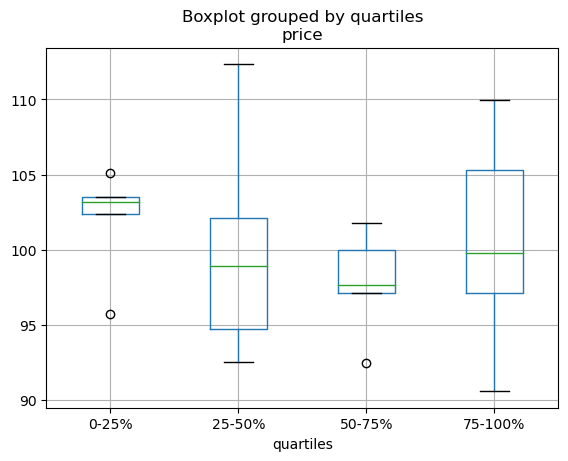

In [181]:
#Plotting
df = pd.DataFrame(

    {

        "stratifying_var": np.random.uniform(0, 100, 20),

        "price": np.random.normal(100, 5, 20),

    }

)



df["quartiles"] = pd.qcut(

    df["stratifying_var"], 4, labels=["0-25%", "25-50%", "50-75%", "75-100%"]

)



df.boxplot(column="price", by="quartiles")

In [182]:
'''
Reading multiple files to create a single DataFrame
The best way to combine multiple files into a single DataFrame is
to read the individual frames one by one, put all of the individual frames into a list, 
and then combine the frames in the list using pd.concat():
'''

for i in range(3):

    data = pd.DataFrame(np.random.randn(10, 4))

    data.to_csv("file_{}.csv".format(i))



files = ["file_0.csv", "file_1.csv", "file_2.csv"]

result = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)
result

,Unnamed: 0,0,1,2,3
0,0,1.149085,0.173263,-0.754514,1.538856
1,1,0.871726,0.283068,-1.309550,-0.528257
2,2,1.032498,-0.349461,0.306380,0.963168
3,3,0.869446,-1.360006,-0.206627,0.598891
4,4,1.753434,0.781160,-1.172335,2.547830
5,5,-0.706454,-0.212471,0.279007,-0.625898
6,6,-0.425710,-1.782152,-0.965275,0.764582
7,7,-1.007067,-0.683446,0.997790,0.722057
8,8,1.592100,-0.448907,1.218836,-0.675880
9,9,-2.211264,-0.704437,1.454902,0.292094


In [183]:
#You can use the same approach to read all files matching a pattern. Here is an example using glob:

import glob

import os

files = glob.glob("file_*.csv")

result = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)
result

,Unnamed: 0,0,1,2,3
0,0,1.149085,0.173263,-0.754514,1.538856
1,1,0.871726,0.283068,-1.309550,-0.528257
2,2,1.032498,-0.349461,0.306380,0.963168
3,3,0.869446,-1.360006,-0.206627,0.598891
4,4,1.753434,0.781160,-1.172335,2.547830
5,5,-0.706454,-0.212471,0.279007,-0.625898
6,6,-0.425710,-1.782152,-0.965275,0.764582
7,7,-1.007067,-0.683446,0.997790,0.722057
8,8,1.592100,-0.448907,1.218836,-0.675880
9,9,-2.211264,-0.704437,1.454902,0.292094


In [184]:
'''
Parsing date components in multi-columns
Parsing date components in multi-columns is faster with a format
'''
i = pd.date_range("20000101", periods=10000)

df = pd.DataFrame({"year": i.year, "month": i.month, "day": i.day})

df.head()

,year,month,day
0,2000,1,1
1,2000,1,2
2,2000,1,3
3,2000,1,4
4,2000,1,5


In [185]:
pd.to_datetime(df.year * 10000 + df.month * 100 + df.day, format='%Y%m%d')

0      2000-01-01
1      2000-01-02
2      2000-01-03
3      2000-01-04
4      2000-01-05
          ...    
9995   2027-05-14
9996   2027-05-15
9997   2027-05-16
9998   2027-05-17
9999   2027-05-18
Length: 10000, dtype: datetime64[ns]

In [186]:
%timeit pd.to_datetime(df.year * 10000 + df.month * 100 + df.day, format='%Y%m%d')



5.2 ms ± 275 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [187]:
#faster
ds = df.apply(lambda x: "%04d-%02d-%02d" % (x["year"], x["month"], x["day"]), axis=1)

ds.head()



0    2000-01-01
1    2000-01-02
2    2000-01-03
3    2000-01-04
4    2000-01-05
dtype: object

In [188]:
%timeit pd.to_datetime(ds)

3.7 ms ± 63.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [189]:
#Skip row between header and data
data = """;;;;

 ;;;;

 ;;;;

 ;;;;

 ;;;;

 ;;;;

;;;;

 ;;;;

 ;;;;

;;;;

date;Param1;Param2;Param4;Param5

    ;m²;°C;m²;m

;;;;

01.01.1990 00:00;1;1;2;3

01.01.1990 01:00;5;3;4;5

01.01.1990 02:00;9;5;6;7

01.01.1990 03:00;13;7;8;9

01.01.1990 04:00;17;9;10;11

01.01.1990 05:00;21;11;12;13

"""
data

';;;;\n\n ;;;;\n\n ;;;;\n\n ;;;;\n\n ;;;;\n\n ;;;;\n\n;;;;\n\n ;;;;\n\n ;;;;\n\n;;;;\n\ndate;Param1;Param2;Param4;Param5\n\n    ;m²;°C;m²;m\n\n;;;;\n\n01.01.1990 00:00;1;1;2;3\n\n01.01.1990 01:00;5;3;4;5\n\n01.01.1990 02:00;9;5;6;7\n\n01.01.1990 03:00;13;7;8;9\n\n01.01.1990 04:00;17;9;10;11\n\n01.01.1990 05:00;21;11;12;13\n\n'

In [190]:
from io import StringIO

pd.read_csv(

    StringIO(data),

    sep=";",

    skiprows=[11, 12],

    index_col=0,

    parse_dates=True,

    header=10,

)

,m²,°C,m².1,m
,,,,
NaT,NaN,NaN,NaN,NaN
1990-01-01 00:00:00,1.0,1.0,2.0,3.0
1990-01-01 01:00:00,5.0,3.0,4.0,5.0
1990-01-01 02:00:00,9.0,5.0,6.0,7.0
1990-01-01 03:00:00,13.0,7.0,8.0,9.0
1990-01-01 04:00:00,17.0,9.0,10.0,11.0
1990-01-01 05:00:00,21.0,11.0,12.0,13.0


In [191]:
pd.read_csv(StringIO(data), sep=";", header=10, nrows=10).columns




Index(['date', 'Param1', 'Param2', 'Param4', 'Param5'], dtype='object')

In [192]:
columns = pd.read_csv(StringIO(data), sep=";", header=10, nrows=10).columns
columns

Index(['date', 'Param1', 'Param2', 'Param4', 'Param5'], dtype='object')

In [193]:
pd.read_csv(

    StringIO(data), sep=";", index_col=0, header=12, parse_dates=True, names=columns

)

,Param1,Param2,Param4,Param5
date,,,,
1990-01-01 00:00:00,1,1,2,3
1990-01-01 01:00:00,5,3,4,5
1990-01-01 02:00:00,9,5,6,7
1990-01-01 03:00:00,13,7,8,9
1990-01-01 04:00:00,17,9,10,11
1990-01-01 05:00:00,21,11,12,13


In [194]:
#Storing Attributes to a group node
df = pd.DataFrame(np.random.randn(8, 3))
df

,0,1,2
0,-0.688478,-0.829524,-0.835846
1,-1.537201,-0.198120,0.277623
2,-0.336114,-0.282922,-0.433863
3,-0.382823,-0.955761,-2.167036
4,0.604407,0.660010,-0.172427
5,0.754510,-0.644424,-0.910490
6,-0.431499,0.978669,0.883973
7,-1.282334,-0.237024,-1.432312


In [199]:
store = pd.HDFStore("test.h5")

store.put("df", df)

# you can store an arbitrary Python object via pickle

store.get_storer("df").attrs.my_attribute = {"A": 10}

store.get_storer("df").attrs.my_attribute


{'A': 10}

In [207]:
store.close()

In [209]:
store1 = pd.HDFStore("test1.h5", "w", driver="H5FD_CORE")

df = pd.DataFrame(np.random.randn(8, 3))

store1["test"] = df

# only after closing the store, data is written to disk:

store1.close()

In [214]:
# Open the HDF5 file
store2 = pd.HDFStore("test1.h5", mode='r')  # 'r' mode for read-only

# Read the DataFrame
df = store2['test']

# Don't forget to close the store when you're done
store2.close()

df

,0,1,2
0,1.682040,0.329929,-1.565997
1,-0.800988,0.189627,-0.253438
2,1.165559,-1.713508,1.440745
3,-0.078213,0.217458,-1.021144
4,2.165793,1.579181,-1.736829
5,-0.242302,1.381565,-0.087634
6,-0.062506,-0.376674,1.434519
7,-0.446480,0.407797,1.350536


In [ ]:
#Binary Files
'''
pandas readily accepts NumPy record arrays, if you need to read in a binary file consisting of an array of C structs. For example, given this C program in a file called main.c compiled with gcc main.c -std=gnu99 on a 64-bit machine,

#include <stdio.h>
#include <stdint.h>

typedef struct _Data
{
    int32_t count;
    double avg;
    float scale;
} Data;

int main(int argc, const char *argv[])
{
    size_t n = 10;
    Data d[n];

    for (int i = 0; i < n; ++i)
    {
        d[i].count = i;
        d[i].avg = i + 1.0;
        d[i].scale = (float) i + 2.0f;
    }

    FILE *file = fopen("binary.dat", "wb");
    fwrite(&d, sizeof(Data), n, file);
    fclose(file);

    return 0;
}
'''

In [ ]:
names = "count", "avg", "scale"

# note that the offsets are larger than the size of the type because of
# struct padding
offsets = 0, 8, 16
formats = "i4", "f8", "f4"
dt = np.dtype({"names": names, "offsets": offsets, "formats": formats}, align=True)
df = pd.DataFrame(np.fromfile("binary.dat", dt))

In [233]:
#Correlation
#Often it’s useful to obtain the lower (or upper) triangular form of a correlation matrix calculated from DataFrame.corr(). This can be achieved by passing a boolean mask to where as follows:

df = pd.DataFrame(np.random.random(size=(100, 5)))
df

,0,1,2,3,4
0,0.158632,0.241947,0.473862,0.987715,0.636778
1,0.503681,0.668137,0.579992,0.509648,0.625470
2,0.185217,0.855812,0.556861,0.273467,0.402600
3,0.818799,0.865627,0.716080,0.078121,0.703442
4,0.787362,0.636122,0.379508,0.486119,0.124762
...,...,...,...,...,...
95,0.397368,0.870038,0.093215,0.222548,0.117764
96,0.860949,0.143568,0.016891,0.984224,0.999263
97,0.474464,0.019370,0.536931,0.884515,0.941131
98,0.282244,0.438624,0.355108,0.637953,0.875471


In [234]:
corr_mat = df.corr()
corr_mat

,0,1,2,3,4
0,1.000000,0.065795,0.071962,-0.019780,0.026380
1,0.065795,1.000000,-0.025396,-0.163379,0.083179
2,0.071962,-0.025396,1.000000,-0.160478,0.063641
3,-0.019780,-0.163379,-0.160478,1.000000,0.094728
4,0.026380,0.083179,0.063641,0.094728,1.000000


In [235]:
mask = np.tril(np.ones_like(corr_mat, dtype=np.bool_), k=-1)
mask

array([[False, False, False, False, False],
       [ True, False, False, False, False],
       [ True,  True, False, False, False],
       [ True,  True,  True, False, False],
       [ True,  True,  True,  True, False]])

In [236]:
corr_mat.where(mask)

,0,1,2,3,4
0,NaN,NaN,NaN,NaN,NaN
1,0.065795,NaN,NaN,NaN,NaN
2,0.071962,-0.025396,NaN,NaN,NaN
3,-0.019780,-0.163379,-0.160478,NaN,NaN
4,0.026380,0.083179,0.063641,0.094728,NaN


In [237]:
import numpy as np

def pearsoncorr(x, y):
    n = len(x)
    
    # Compute means
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    # Center the data
    x_centered = x - x_mean
    y_centered = y - y_mean
    
    # Compute covariance
    covariance = np.sum(x_centered * y_centered) / n
    
    # Compute standard deviations
    std_x = np.sqrt(np.sum(x_centered**2) / n)
    std_y = np.sqrt(np.sum(y_centered**2) / n)
    
    # Compute Pearson correlation
    correlation = covariance / (std_x * std_y)
    
    return correlation

In [238]:
corr_mat = df.corr(method=pearsoncorr)
corr_mat

,0,1,2,3,4
0,1.000000,0.065795,0.071962,-0.019780,0.026380
1,0.065795,1.000000,-0.025396,-0.163379,0.083179
2,0.071962,-0.025396,1.000000,-0.160478,0.063641
3,-0.019780,-0.163379,-0.160478,1.000000,0.094728
4,0.026380,0.083179,0.063641,0.094728,1.000000


In [239]:
corr_mat.where(mask)

,0,1,2,3,4
0,NaN,NaN,NaN,NaN,NaN
1,0.065795,NaN,NaN,NaN,NaN
2,0.071962,-0.025396,NaN,NaN,NaN
3,-0.019780,-0.163379,-0.160478,NaN,NaN
4,0.026380,0.083179,0.063641,0.094728,NaN


In [230]:
#The method argument within DataFrame.corr can accept a callable in addition to the named correlation types. 
# Here we compute the distance correlation matrix for a DataFrame object.

def distcorr(x, y):

    n = len(x)

    a = np.zeros(shape=(n, n))

    b = np.zeros(shape=(n, n))

    for i in range(n):

        for j in range(i + 1, n):

            a[i, j] = abs(x[i] - x[j])

            b[i, j] = abs(y[i] - y[j])

    a += a.T

    b += b.T

    a_bar = np.vstack([np.nanmean(a, axis=0)] * n)

    b_bar = np.vstack([np.nanmean(b, axis=0)] * n)

    A = a - a_bar - a_bar.T + np.full(shape=(n, n), fill_value=a_bar.mean())

    B = b - b_bar - b_bar.T + np.full(shape=(n, n), fill_value=b_bar.mean())

    cov_ab = np.sqrt(np.nansum(A * B)) / n

    std_a = np.sqrt(np.sqrt(np.nansum(A ** 2)) / n)

    std_b = np.sqrt(np.sqrt(np.nansum(B ** 2)) / n)

    return cov_ab / std_a / std_b





In [231]:
df.corr(method=distcorr)

,0,1,2,3,4
0,1.000000,0.134443,0.147148,0.168148,0.145352
1,0.134443,1.000000,0.203378,0.239592,0.131083
2,0.147148,0.203378,1.000000,0.172314,0.137155
3,0.168148,0.239592,0.172314,1.000000,0.114885
4,0.145352,0.131083,0.137155,0.114885,1.000000


In [232]:
df = pd.DataFrame(np.random.normal(size=(100, 3)))

df.corr(method=distcorr)

,0,1,2
0,1.000000,0.143663,0.126988
1,0.143663,1.000000,0.197295
2,0.126988,0.197295,1.000000


In [240]:
#Using timedeltas
import datetime

s = pd.Series(pd.date_range("2012-1-1", periods=3, freq="D"))
s

0   2012-01-01
1   2012-01-02
2   2012-01-03
dtype: datetime64[ns]

In [241]:
s - s.max()

0   -2 days
1   -1 days
2    0 days
dtype: timedelta64[ns]

In [242]:
s.max() - s

0   2 days
1   1 days
2   0 days
dtype: timedelta64[ns]

In [243]:
s - datetime.datetime(2011, 1, 1, 3, 5)

0   364 days 20:55:00
1   365 days 20:55:00
2   366 days 20:55:00
dtype: timedelta64[ns]

In [244]:
s + datetime.timedelta(minutes=5)

0   2012-01-01 00:05:00
1   2012-01-02 00:05:00
2   2012-01-03 00:05:00
dtype: datetime64[ns]

In [245]:
datetime.datetime(2011, 1, 1, 3, 5) - s

0   -365 days +03:05:00
1   -366 days +03:05:00
2   -367 days +03:05:00
dtype: timedelta64[ns]

In [246]:
datetime.timedelta(minutes=5) + s

0   2012-01-01 00:05:00
1   2012-01-02 00:05:00
2   2012-01-03 00:05:00
dtype: datetime64[ns]

In [247]:
deltas = pd.Series([datetime.timedelta(days=i) for i in range(3)])
deltas

0   0 days
1   1 days
2   2 days
dtype: timedelta64[ns]

In [249]:
df = pd.DataFrame({"A": s, "B": deltas})
df

,A,B
0,2012-01-01,0 days
1,2012-01-02,1 days
2,2012-01-03,2 days


In [250]:
df["New Dates"] = df["A"] + df["B"]

In [251]:
df

,A,B,New Dates
0,2012-01-01,0 days,2012-01-01
1,2012-01-02,1 days,2012-01-03
2,2012-01-03,2 days,2012-01-05


In [252]:
df["Delta"] = df["A"] - df["New Dates"]
df

,A,B,New Dates,Delta
0,2012-01-01,0 days,2012-01-01,0 days
1,2012-01-02,1 days,2012-01-03,-1 days
2,2012-01-03,2 days,2012-01-05,-2 days


In [253]:
df.dtypes

A             datetime64[ns]
B            timedelta64[ns]
New Dates     datetime64[ns]
Delta        timedelta64[ns]
dtype: object

In [255]:
s

0   2012-01-01
1   2012-01-02
2   2012-01-03
dtype: datetime64[ns]

In [254]:
#Values can be set to NaT using np.nan, similar to datetime
y = s - s.shift()
y

0      NaT
1   1 days
2   1 days
dtype: timedelta64[ns]

In [256]:
y[1] = np.nan
y

0      NaT
1      NaT
2   1 days
dtype: timedelta64[ns]

In [257]:
#Creating example data
#To create a dataframe from every combination of some given values, like R’s expand.grid() function, we can create a dict where the keys are column names and the values are lists of the data values:
def expand_grid(data_dict):

    rows = itertools.product(*data_dict.values())

    return pd.DataFrame.from_records(rows, columns=data_dict.keys())

In [258]:
df = expand_grid(

    {"height": [60, 70], "weight": [100, 140, 180], "sex": ["Male", "Female"]}

)
df

,height,weight,sex
0,60,100,Male
1,60,100,Female
2,60,140,Male
3,60,140,Female
4,60,180,Male
5,60,180,Female
6,70,100,Male
7,70,100,Female
8,70,140,Male
9,70,140,Female


In [260]:
s

0   2012-01-01
1   2012-01-02
2   2012-01-03
dtype: datetime64[ns]

In [259]:
#Constant series
# To assess if a series has a constant value, we can check if series.nunique() <= 1. 
# However, a more performant approach, that does not count all unique values first, is:
v = s.to_numpy()
v

array(['2012-01-01T00:00:00.000000000', '2012-01-02T00:00:00.000000000',
       '2012-01-03T00:00:00.000000000'], dtype='datetime64[ns]')

In [262]:
is_constant = v.shape[0] == 0 or (s[0] == s).all()
is_constant

False

In [ ]:
#This approach assumes that the series does not contain missing values.
#For the case that we would drop NA values, we can simply remove those values first:

In [263]:
v = s.dropna().to_numpy()

is_constant = v.shape[0] == 0 or (s[0] == s).all()
is_constant

False

In [265]:
#If missing values are considered distinct from any other value, then one could use:
v = s.to_numpy()

is_constant = v.shape[0] == 0 or (s[0] == s).all() or not pd.notna(v).any()
is_constant

False